In [1]:
# 2-1. 임포트

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
import extra_keras_datasets.emnist as emnist

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout

In [4]:

_, (v_images, v_labels) = emnist.load_data(type='letters')

def adjust_image(img):
    img = img.astype('float32')
    img = img/255.0
    img = img.reshape(-1, 28, 28, 1) #3D -> 4D
    return img

v_images = adjust_image(v_images)

INFO:root:Loading dataset = emnist


In [5]:
# 2-2. 데이터 로드 h5

model = keras.models.load_model('my-model.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 64)         

In [7]:
# 2-4. 모델 평가 수행 : 평가에 대한 이미지 데이터와 정답 레이블을 검증
# 검증데이터에 대한 [손실함수], 정확도 결과 표시

model.evaluate(v_images, v_labels)

650/650 [==============================] - 10s 15ms/step - loss: 0.1670 - accuracy: 0.9459


[0.16696162521839142, 0.9459134340286255]

In [9]:
# 2-5. 검증 데이터가 실제로 어떻게 예측하고 있는지 리턴

res = model.predict(v_images)
print(res[1])

[7.3094677e-36 9.9999964e-01 4.8889368e-11 5.1846511e-14 8.0340218e-10
 4.4767881e-13 7.3553990e-09 1.9111377e-08 2.2448687e-07 2.5024788e-15
 3.7522868e-13 1.9821013e-12 1.6113155e-14 6.5345007e-11 2.3970248e-09
 1.4091937e-14 1.6090339e-10 3.7891553e-08 1.3953856e-07 6.2811485e-11
 8.6634053e-13 2.4209549e-16 2.2835367e-22 2.4499422e-15 1.5931281e-12
 6.6677322e-14 2.5810987e-15]


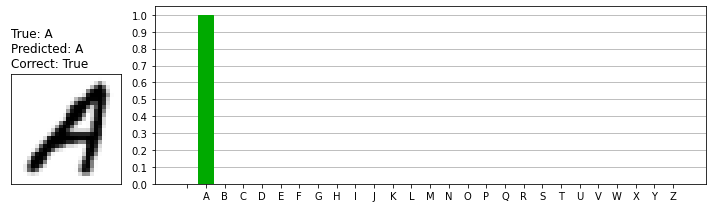

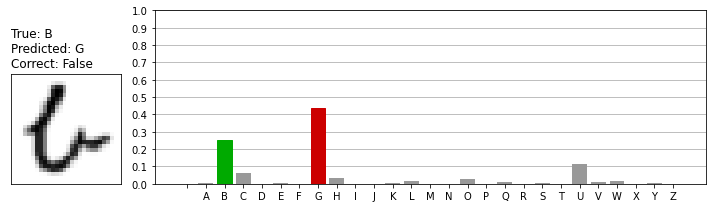

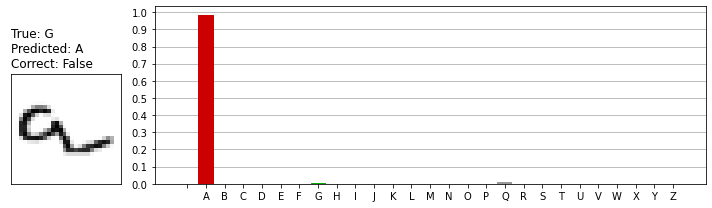

In [22]:
# 2-6 시각화

class_names=list(" ABCDEFGHIJKLMNOPQRSTUVWXYZ")
assert len(class_names) == 27

# (h, w, 1) -> (h, w) 변경하는 함수
def compatible_image(img):
    if img.ndim == 3 and img.shape[2] == 1:
        img = img.reshape(img.shape[0], img.shape[1])
        
    return img

def show_prediction(i, predictions, images, true_labels):
    
    prediction, image, true_label = predictions[i], images[i], true_labels[i]
    predicted_label = np.argmax(prediction)
    
    plt.rcParams["font.size"] = 10
    
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(10, 3), gridspec_kw={"width_ratios": [1, 5]}
    )
    
    label = "True: {}\nPredicted: {}\nCorrect: {}".format(
        class_names[true_label],
        class_names[predicted_label],
        true_label == predicted_label,
    )
    
    ax1.set_title(label, loc="left", fontsize=12)
    ax1.set_anchor("S")  # S=Bottom
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(compatible_image(image), cmap=plt.cm.binary)
    x_pos = np.arange(len(class_names))
    container = ax2.bar(x_pos, prediction, color="#999")
    container[predicted_label].set_color("#C00")  
    container[true_label].set_color("#0A0") 
    ax2.set_yticks(np.arange(0, 1.1, 0.1))
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(class_names)
    ax2.grid(True, axis="y")
    ax2.set_axisbelow(True)
    plt.tight_layout()
    plt.show()
    
# step 2-6  
show_prediction(1, res, v_images, v_labels)
show_prediction(1000, res, v_images, v_labels)
show_prediction(5480, res, v_images, v_labels)

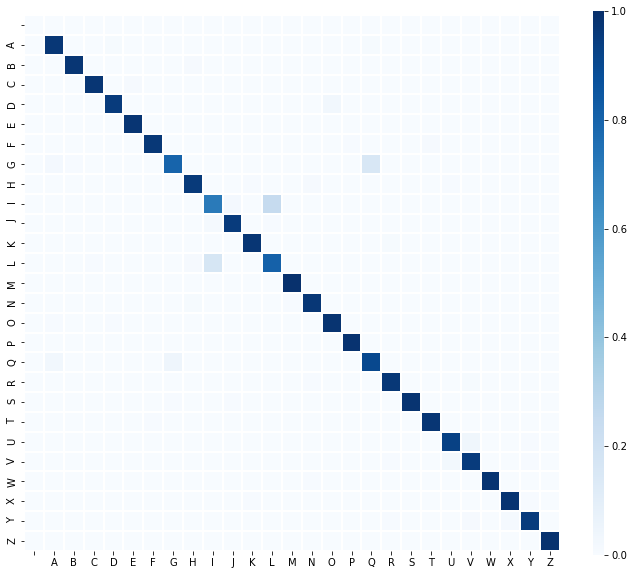

In [24]:
# 2-7. 시각화 바꾸기
import seaborn as sns

def show_confusion_matrix(predictions, true_labels, class_names):
    pred_labels = np.argmax(predictions, axis=1)
    cm = tf.math.confusion_matrix(true_labels, pred_labels)
    cm = cm / cm.numpy().sum(axis=1)[:, tf.newaxis]  # Normalize
    cm = np.nan_to_num(cm)
    plt.rcParams["font.size"] = 10
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        vmin=0.0,
        vmax=1.0,
        cmap="Blues",
        cbar_kws={"aspect": 50},
        square=True,
        linewidths=1,
        xticklabels=class_names,
        yticklabels=class_names,
    )
    
    plt.show()
    
show_confusion_matrix(res, v_labels, class_names)
# 세로축이 정답 레이블, 가로축이 예측 레이블